In [1]:
# Set up, import dependencies
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
import numpy as np
import pandas as pd
import datetime as dt, datetime
from datetime import timedelta

In [3]:
import warnings
warnings.filterwarnings('ignore')

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy as sql
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import *


In [5]:
# Create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# Reflect an existing database into a new model
Base = automap_base()
# Reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# Show all of the tables that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Query all columns in Measurement table, limit to first 5 row
measurement_tab = engine.execute('select * from Measurement limit 5').fetchall()
measurement_tab

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [11]:
# Inspect table Measurement
inspector = inspect(engine)
columns = inspector.get_columns('Measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [12]:
# Check data in Measurement table
measurement_row1 = session.query(Measurement).first()
measurement_row1.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1d34934abb0>,
 'date': '2010-01-01',
 'id': 1,
 'prcp': 0.08,
 'tobs': 65.0,
 'station': 'USC00519397'}

In [13]:
# Query all columns of the table Station
station_tab = engine.execute('select * from Station').fetchall()
station_tab

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [14]:
# Inspect table Station
inspector = inspect(engine)
columns = inspector.get_columns('Station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [15]:
# Check data in Measurement table
station_row1 = session.query(Station).first()
station_row1.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1d349384100>,
 'station': 'USC00519397',
 'name': 'WAIKIKI 717.2, HI US',
 'longitude': -157.8168,
 'id': 1,
 'latitude': 21.2716,
 'elevation': 3.0}

In [16]:
# Find the most recent date in the data set.
recent_date_q = session.query(Measurement.date).order_by(Measurement.date.desc()).first()

# Convert the most recent_date string into datetime type
recent_date = pd.to_datetime(pd.Series(recent_date_q[0]), format="%Y/%m/%d").dt.date
print(f"\033[94m\033[1mThe most recent date in the data set is: {recent_date[0]}\033[0m")

The most recent date in the data set is: 2017-08-23


In [17]:
# Calculate the date one year (i.e. 365 days) from the last date in data set.
one_year = recent_date - dt.timedelta(days=365)

# Convert object to datetime format
a_year_range = one_year[0]
a_year_range

datetime.date(2016, 8, 23)

In [18]:
# Perform a query to retrieve the data and precipitation scores
prcp_score = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= a_year_range).\
            order_by(Measurement.date).all()


In [19]:
# Save the query results as a Pandas DataFrame
prcp_score_df = []
prcp_score_df = pd.DataFrame(prcp_score, columns=["date","precipitation"])

# Sort the dataframe by date
prcp_score_df = prcp_score_df.sort_values(by='date')

# Set date as index column for plotting graph
prcp_score_df = prcp_score_df.set_index("date")

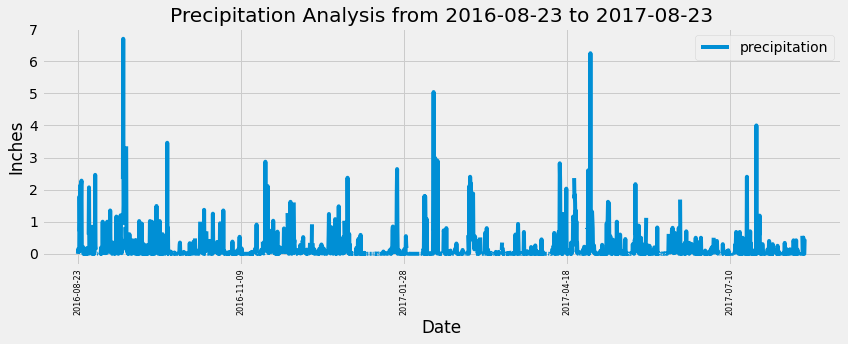

In [20]:
# Use Pandas Plotting with Matplotlib to plot the data
prcp_score_df.plot(figsize=(12,5))
plt.title("Precipitation Analysis from 2016-08-23 to 2017-08-23")
plt.xticks(rotation=90, fontsize=8)
plt.xlabel("Date")
plt.ylabel("Inches")
plt.tight_layout()

# Save graph to file
plt.savefig("Images/prcp.png")

plt.show()


In [21]:
# Use Pandas to calculate the summary statistics for the precipitation data
print(f"\033[94m\033[1mThe table below is the summary statistics for the precipitation data:\033[0m")
prcp_score_df.describe()

The table below is the summary statistics for the precipitation data:


,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [22]:
# Design a query to calculate the total number stations in the dataset
total_station = session.query(Station.station).distinct().count()

print(f"\033[94m\033[1mThe total number of stations in this dataset is: {total_station}\033[0m")

The total number of stations in this dataset is: 9


In [23]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations_list = session.query(Measurement.station,func.count(Measurement.station)).\
                        group_by(Measurement.station).\
                        order_by(func.count(Measurement.station).desc()).all()
print(f"\033[94m\033[1mBelow is the list of the active stations:\033[0m")
active_stations_list

Below is the list of the active stations:


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [24]:
# Get the most active stations name & id
most_active_station = session.query(Measurement.station).\
                        group_by(Measurement.station).\
                        order_by(func.count(Measurement.station).desc()).first()

most_active_station_id = most_active_station[0]
# most_active_station_name = most_active_station[1]
print(f"\033[94m\033[1mThe most active station is: '{most_active_station_id}'\033[0m")

The most active station is: 'USC00519281'


In [25]:
# Using the most active station name from the previous query, calculate the lowest, highest, and average temperature.

# Setup query variable for min, max and average temperation
cal_stats = [func.min(Measurement.tobs), func.max(Measurement.tobs),func.avg(Measurement.tobs)]

# Query the active station name 
most_active_station_temp = session.query(*cal_stats).\
    filter(Measurement.station == most_active_station_id).all()


In [26]:
# Turn the results that returned by the query into dataframe for displaying
active_station_df = []
active_station_df = pd.DataFrame(most_active_station_temp, columns=["Lowest (min)", "Highest (Max)", "Average"])
print(f"\033[94m\033[1mThe temperature of the most active station '{most_active_station_id}' is:\033[0m")
active_station_df

The temperature of the most active station 'USC00519281' is:


,Lowest (min),Highest (Max),Average
0,54.0,85.0,71.663781


In [27]:
# Using the most active station name
# Query the last 12 months of temperature observation data for this station 
last_12_months_data = session.query(Measurement.tobs).\
                filter(Measurement.date >= a_year_range).\
                filter(Measurement.station == most_active_station_id).\
                order_by(Measurement.date).all()

# Convert query data into dataframe for ploting
last_12_months_data_df = pd.DataFrame(last_12_months_data, columns=["tobs"])


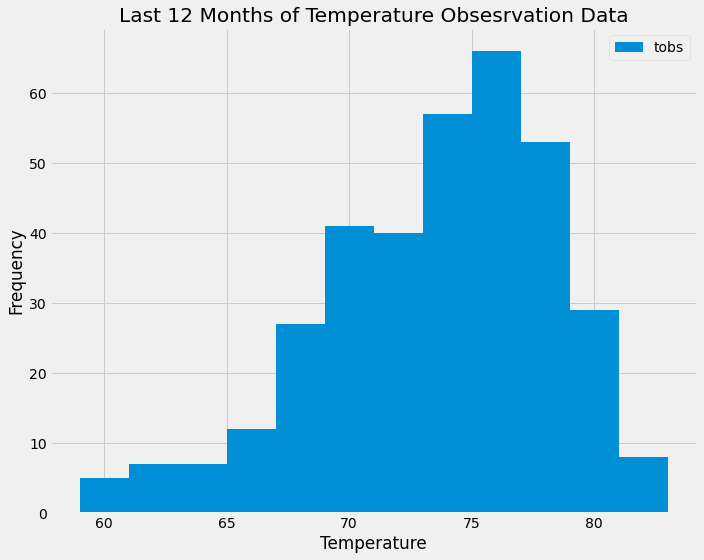

In [28]:
# Plot the Results as a Histogram with `bins=12`
last_12_months_data_df.plot.hist(bins=12, title="Last 12 Months of Temperature Obsesrvation Data",figsize=(10,8))
plt.xlabel("Temperature")
plt.tight_layout()
plt.savefig("Images/last_12_months_tobs.png")
plt.show()

# Close session

In [29]:
# Close Session
session.close()